# Project Title (Predict Bank Product Uptake)

* Write out the problem statement
* Give a short description of the project


In [260]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

In [261]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv('bank2.csv',sep = ";", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [262]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [263]:
#delete the first row 
data.drop(0,inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [264]:
#inspect the data
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4521,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [265]:
#Delete poutcome column as it contains lots of unknowns
data.drop("poutcome", axis=1, inplace=True)


In [266]:
#Delete contact column  as it contains lots of unknowns
data.drop("contact", axis=1, inplace=True)

In [267]:
#replace no with 0
#replace yes with 1
data.replace({"no":0, "yes":1}, inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
1,30,unemployed,married,primary,0,1787,0,0,19,oct,79,1,-1,0,0
2,33,services,married,secondary,0,4789,1,1,11,may,220,1,339,4,0
3,35,management,single,tertiary,0,1350,1,0,16,apr,185,1,330,1,0
4,30,management,married,tertiary,0,1476,1,1,3,jun,199,4,-1,0,0
5,59,blue-collar,married,secondary,0,0,1,0,5,may,226,1,-1,0,0


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   object
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   day        4521 non-null   object
 9   month      4521 non-null   object
 10  duration   4521 non-null   object
 11  campaign   4521 non-null   object
 12  pdays      4521 non-null   object
 13  previous   4521 non-null   object
 14  y          4521 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 529.9+ KB


In [269]:
data.describe()

,default,housing,loan,y
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.016810,0.566025,0.152842,0.115240
std,0.128575,0.495676,0.359875,0.319347
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [270]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [271]:
data.shape

(4521, 15)

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [272]:
#data cleasning cells
# Check for missing figures
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [273]:
#run 'age', 'balance' and 'duration' columns to change data type to int
data['age'] = data.age.astype(str).astype(('Int64'))
data['balance'] = data.balance.astype(str).astype(('Int64'))
data['duration'] = data.duration.astype(str).astype(('Int64'))
data['day'] = data.day.astype(str).astype(('Int64'))
data['campaign'] =  data.campaign.astype(str).astype(('Int64'))
data['pdays'] = data.pdays.astype(str).astype(('Int64'))
data['previous'] = data.previous.astype(str).astype(('Int64'))

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   Int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   Int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   day        4521 non-null   Int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   Int64 
 11  campaign   4521 non-null   Int64 
 12  pdays      4521 non-null   Int64 
 13  previous   4521 non-null   Int64 
 14  y          4521 non-null   int64 
dtypes: Int64(7), int64(4), object(4)
memory usage: 560.8+ KB


# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

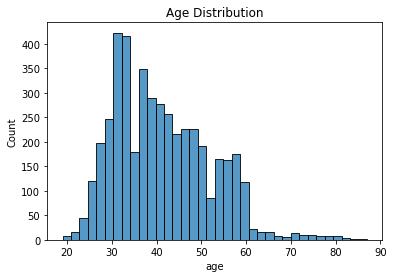

In [275]:
sns.histplot(data=feature_columns['age'])
plt.title('Age Distribution')

plt.show()

In [276]:
# From the Age distribution histogram plot, customers between age brackets 30 - 34 yrs have the highest product uptake

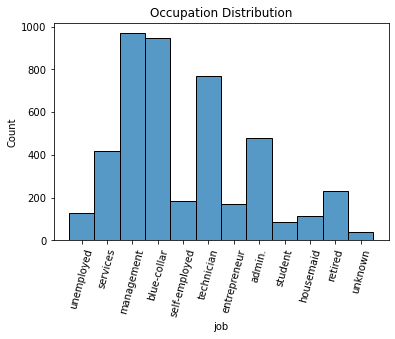

In [277]:
plt.tick_params(axis='x', labelrotation = 75)
sns.histplot(data=data['job'])
plt.title('Occupation Distribution')


plt.show()

In [278]:
# From the Occupation distribution chart, Management jobs is the highest occupation that accessed the product,
# followed by Blue Collar jobs

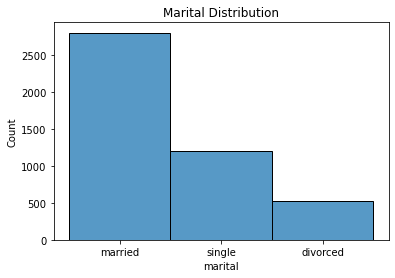

In [279]:
sns.histplot(data=data['marital'])
plt.title('Marital Distribution')


plt.show()

In [280]:
# Married couples have the highest product uptake, more than single and divorced

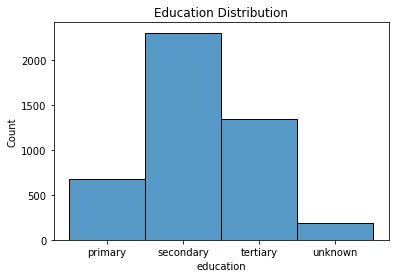

In [281]:
sns.histplot(data=data['education'])
plt.title('Education Distribution')


plt.show()

In [282]:
# Customers that have Secondary School qualification have the highest Product Uptake

## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

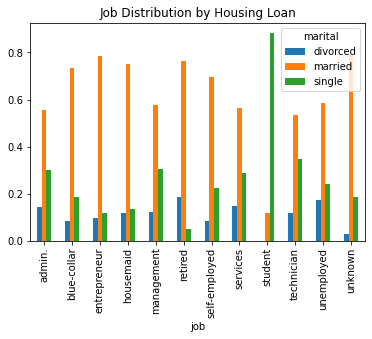

In [283]:
#bivariate analysis cells

#create pivot of sex and income
job_marital_pivot = pd.crosstab(data.job,data.marital,normalize='index')
#plot the data
job_marital_pivot.plot.bar()
# sex_income_pivot.plot.bar()

plt.title('Job Distribution by Housing Loan')
plt.show()


#to shift legend
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [284]:
# Single Students have more product uptake, compared with other occupations

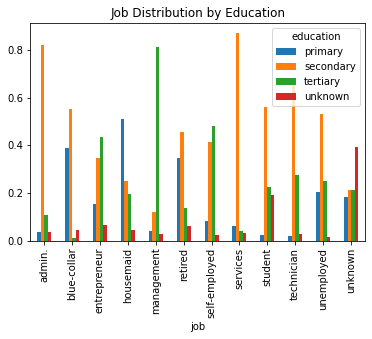

In [285]:
#bivariate analysis cells

#create pivot of job and education
job_education_pivot = pd.crosstab(data.job,data.education,normalize='index')
job_education_pivot.plot.bar()
plt.title('Job Distribution by Education')

plt.show()


In [286]:
# Customers that have secondary school qualification and are employed in 'Services' industry, have the highest Product uptake

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

<AxesSubplot:xlabel='age', ylabel='duration'>

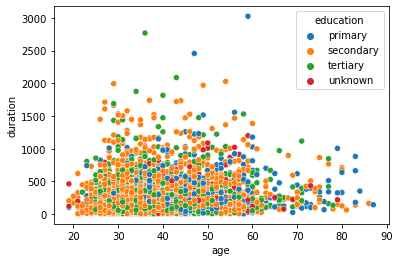

In [287]:
#multivariate analysis cells
# Using hue for categorical column education
sns.scatterplot(data=data, x="age", y="duration", hue="education")

In [288]:
# Customers who possess Secondary School qualifications, and aged between 20yrs and 40yrs
## are regular customers, who transact regularly with the Bank between 0 - 250 days

<AxesSubplot:xlabel='age', ylabel='balance'>

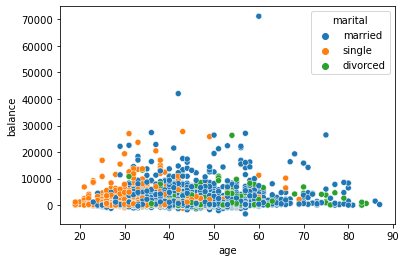

In [289]:
# Using hue for categorical column education
sns.scatterplot(data=data, x="age", y="balance", hue="marital")

In [290]:
## Married couples have balances betweeen 0 and 20,000 

In [291]:
## Feature Engineering**

In [292]:
#to select columns with only integers (numeric columns) and remove columns that contain object
feature_columns = data.select_dtypes(exclude=object)
feature_columns
feature_columns.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

In [293]:
feature_columns.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
1,30,0,1787,0,0,19,79,1,-1,0,0
2,33,0,4789,1,1,11,220,1,339,4,0
3,35,0,1350,1,0,16,185,1,330,1,0
4,30,0,1476,1,1,3,199,4,-1,0,0
5,59,0,0,1,0,5,226,1,-1,0,0


In [294]:
#multivariate analysis cells
#Convert categorical data into numerical using One-Hot Encoding
categorical = ["job","marital","education","month"]
categorical

['job', 'marital', 'education', 'month']

In [295]:
categories_dummies = pd.get_dummies(data[categorical])

categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [296]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

Data1 = pd.concat([data, categories_dummies], axis=1)

#check what you have done
print(Data1.shape)
Data1.head()

(4521, 46)


,age,job,marital,education,default,balance,housing,loan,day,month,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1,30,unemployed,married,primary,0,1787,0,0,19,oct,...,0,0,0,0,0,0,0,0,1,0
2,33,services,married,secondary,0,4789,1,1,11,may,...,0,0,0,0,0,0,1,0,0,0
3,35,management,single,tertiary,0,1350,1,0,16,apr,...,0,0,0,0,0,0,0,0,0,0
4,30,management,married,tertiary,0,1476,1,1,3,jun,...,0,0,0,0,1,0,0,0,0,0
5,59,blue-collar,married,secondary,0,0,1,0,5,may,...,0,0,0,0,0,0,1,0,0,0


In [297]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical do delete all the initially selected columns at once
#replace pass in the code below

Data2 =Data1.drop(categorical,axis=1)

Data2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
2,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
3,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
4,30,0,1476,1,1,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
5,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,0,-333,1,0,30,329,5,-1,0,...,0,0,0,1,0,0,0,0,0,0
4518,57,1,-3313,1,1,9,153,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4519,57,0,295,0,0,19,151,11,-1,0,...,0,0,0,0,0,0,0,0,0,0
4520,28,0,1137,0,0,6,129,4,211,3,...,0,1,0,0,0,0,0,0,0,0


# Summary of Findings

In this markdown cell, summarize your list of findings.

1. 
2. 
3. 
4. 

# Modelling

In this section, you will train and evaluate your models


## Select Target

In [298]:
y = Data2.y

In [299]:
y.head()

1    0
2    0
3    0
4    0
5    0
Name: y, dtype: int64

## Select Features

In [300]:
features =Data2.drop(["y"],axis=1)
features.shape

(4521, 41)

In [301]:
X = Data2[features.columns]


## Train Test Split

In [302]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import seaborn as sns

In [303]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

## Import ML algorithms and initialize them

In [304]:
# Random Forest Classifier

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [306]:
RF_model =  RandomForestClassifier(random_state=30)

In [307]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [308]:
RF_preds = RF_model.predict(X_test)

In [309]:
print(accuracy_score(RF_preds, y_test))

0.8905472636815921


In [310]:
print(classification_report(RF_preds, y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1755
           1       0.15      0.57      0.24        54

    accuracy                           0.89      1809
   macro avg       0.57      0.74      0.59      1809
weighted avg       0.96      0.89      0.92      1809



In [311]:
#KNeighbors

In [312]:
from sklearn.neighbors import KNeighborsClassifier

In [313]:
K_model = KNeighborsClassifier()

In [314]:
K_model.fit(X_train,y_train)

KNeighborsClassifier()

In [315]:
K_preds = K_model.predict(X_test)

In [316]:
from sklearn.metrics import classification_report

In [317]:
print(classification_report(K_preds, y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1729
           1       0.17      0.44      0.24        80

    accuracy                           0.88      1809
   macro avg       0.57      0.67      0.59      1809
weighted avg       0.94      0.88      0.90      1809



In [318]:
# Support Vector Machines

In [319]:
from sklearn.svm import SVC

In [320]:
S_model = SVC()

In [321]:
S_model.fit(X_train,y_train)

SVC()

In [322]:
S_preds = S_model.predict(X_test)

In [323]:
from sklearn.metrics import classification_report

In [324]:
print(classification_report(S_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1809
           1       0.00      0.00      0.00         0

    accuracy                           0.89      1809
   macro avg       0.50      0.44      0.47      1809
weighted avg       1.00      0.89      0.94      1809



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [325]:
#Decision Tree Classifier

In [326]:
from sklearn.tree import DecisionTreeClassifier

In [327]:
DT_model = DecisionTreeClassifier(random_state=30)

In [328]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=30)

In [329]:
DT_preds = DT_model.predict(X_test)

In [330]:
print(accuracy_score(DT_preds, y_test))

0.8767274737423991


In [331]:
print(classification_report(DT_preds, y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1602
           1       0.46      0.46      0.46       207

    accuracy                           0.88      1809
   macro avg       0.70      0.69      0.70      1809
weighted avg       0.88      0.88      0.88      1809



In [332]:
## Confusion Matrix 


In [333]:
from sklearn.metrics import confusion_matrix


In [334]:
#Generate confusion matrix for Random Forest Classifier
cf_matrix = confusion_matrix(y_test, RF_preds)

print(cf_matrix)

[[1580   23]
 [ 175   31]]


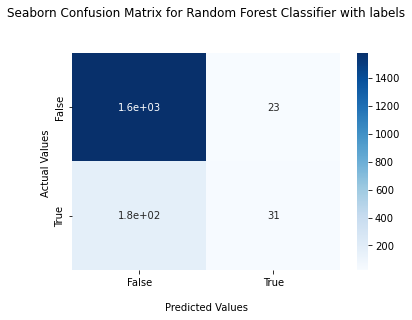

In [335]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Random Forest Classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [336]:
# Generating confusion Matrix with percentages

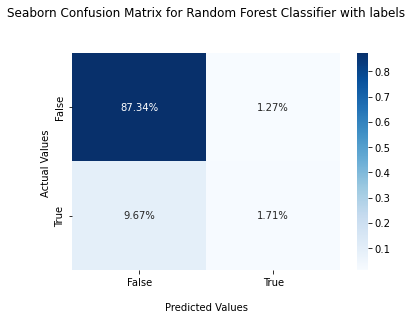

In [337]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Random Forest Classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [338]:
#Generate confusion matrix for KNeighborsClassifier
cf_matrix = confusion_matrix(y_test, K_preds)

print(cf_matrix)

[[1558   45]
 [ 171   35]]


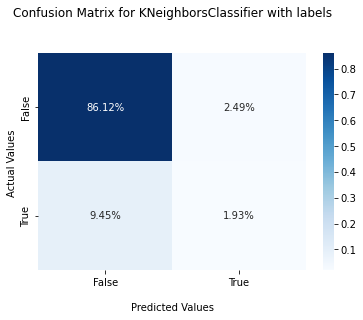

In [339]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for KNeighborsClassifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [340]:
#Generate confusion matrix for Support Vector Machines

In [341]:
cf_matrix = confusion_matrix(y_test, S_preds)

print(cf_matrix)

[[1603    0]
 [ 206    0]]


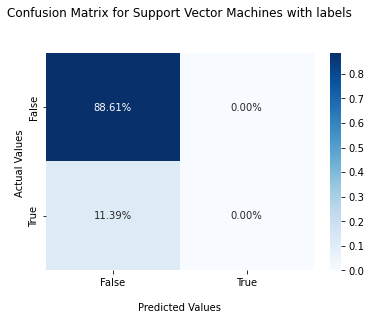

In [342]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Support Vector Machines with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [343]:
#Generate confusion matrix for DecisionTreeClassifier

In [344]:
cf_matrix = confusion_matrix(y_test, DT_preds)

print(cf_matrix)

[[1491  112]
 [ 111   95]]


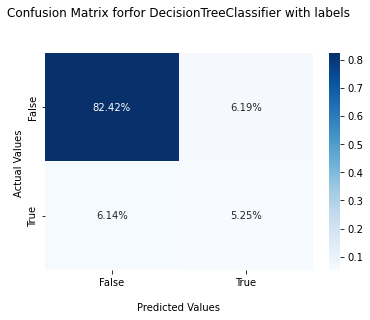

In [345]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix forfor DecisionTreeClassifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Train and Test the models

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

In [ ]:
## Support Vector Machines showed the highest accuracy and precision,
## compared with other machine learning algorithms. 
## Also, Confusion matrices were optimal for Support Vector Machines,
## hence could be construed as the most robust model for predicting the Bank Product uptake.


## Summary

What model should be deployed to production?
Any other comments?

In [ ]:
Support Vector Machines